# Decision Tree untuk Data Padi (Klasifikasi 3 Kelas Berdasarkan Produksi)
Notebook ini mencakup proses membaca data, encoding fitur, mengubah target kontinu menjadi 3 kelas, pelatihan model Decision Tree, dan evaluasi.

In [1]:
# 1. Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# 2. Membaca dan eksplorasi data
data = pd.read_csv('Padi.csv')
print("5 baris pertama data:")
print(data.head())
print("\nInformasi data:")
print(data.info())

5 baris pertama data:
  Provinsi  Tahun   Produksi  Luas Panen  Curah hujan  Kelembapan  \
0     Aceh   1993  1329536.0    323589.0       1627.0       82.00   
1     Aceh   1994  1299699.0    329041.0       1521.0       82.12   
2     Aceh   1995  1382905.0    339253.0       1476.0       82.72   
3     Aceh   1996  1419128.0    348223.0       1557.0       83.00   
4     Aceh   1997  1368074.0    337561.0       1339.0       82.46   

   Suhu rata-rata  
0           26.06  
1           26.92  
2           26.27  
3           26.08  
4           26.31  

Informasi data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Ke

In [3]:
# 3. Cek nilai null dan tipe data
print("\nJumlah data kosong tiap kolom:")
print(data.isnull().sum())


Jumlah data kosong tiap kolom:
Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64


In [4]:
# 4. Encoding kolom kategorikal (fitur)
data_encoded = data.copy()
label_encoders = {}

for col in data_encoded.select_dtypes(include=['object']).columns:
    if col != 'Produksi':  # Jangan encode target numerik
        le = LabelEncoder()
        data_encoded[col] = le.fit_transform(data_encoded[col])
        label_encoders[col] = le

In [5]:
# 5. Binning target 'Produksi' menjadi 3 kelas: Rendah, Sedang, Tinggi
data_encoded['target_kategori'] = pd.cut(
    data_encoded['Produksi'],
    bins=3,
    labels=['Rendah', 'Sedang', 'Tinggi']
)

# Encode target kategori menjadi angka
le_target = LabelEncoder()
y = le_target.fit_transform(data_encoded['target_kategori'])

# Hapus kolom 'Produksi' dan 'target_kategori' dari fitur
X = data_encoded.drop(columns=['Produksi', 'target_kategori'])

In [6]:
# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 7. Melatih model Decision Tree
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [8]:
# 8. Evaluasi model
y_pred = model.predict(X_test)
print("\nAkurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.9333333333333333
Confusion Matrix:
 [[22  2  0]
 [ 1 18  0]
 [ 0  0  2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.90      0.95      0.92        19
           2       1.00      1.00      1.00         2

    accuracy                           0.93        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.93      0.93      0.93        45



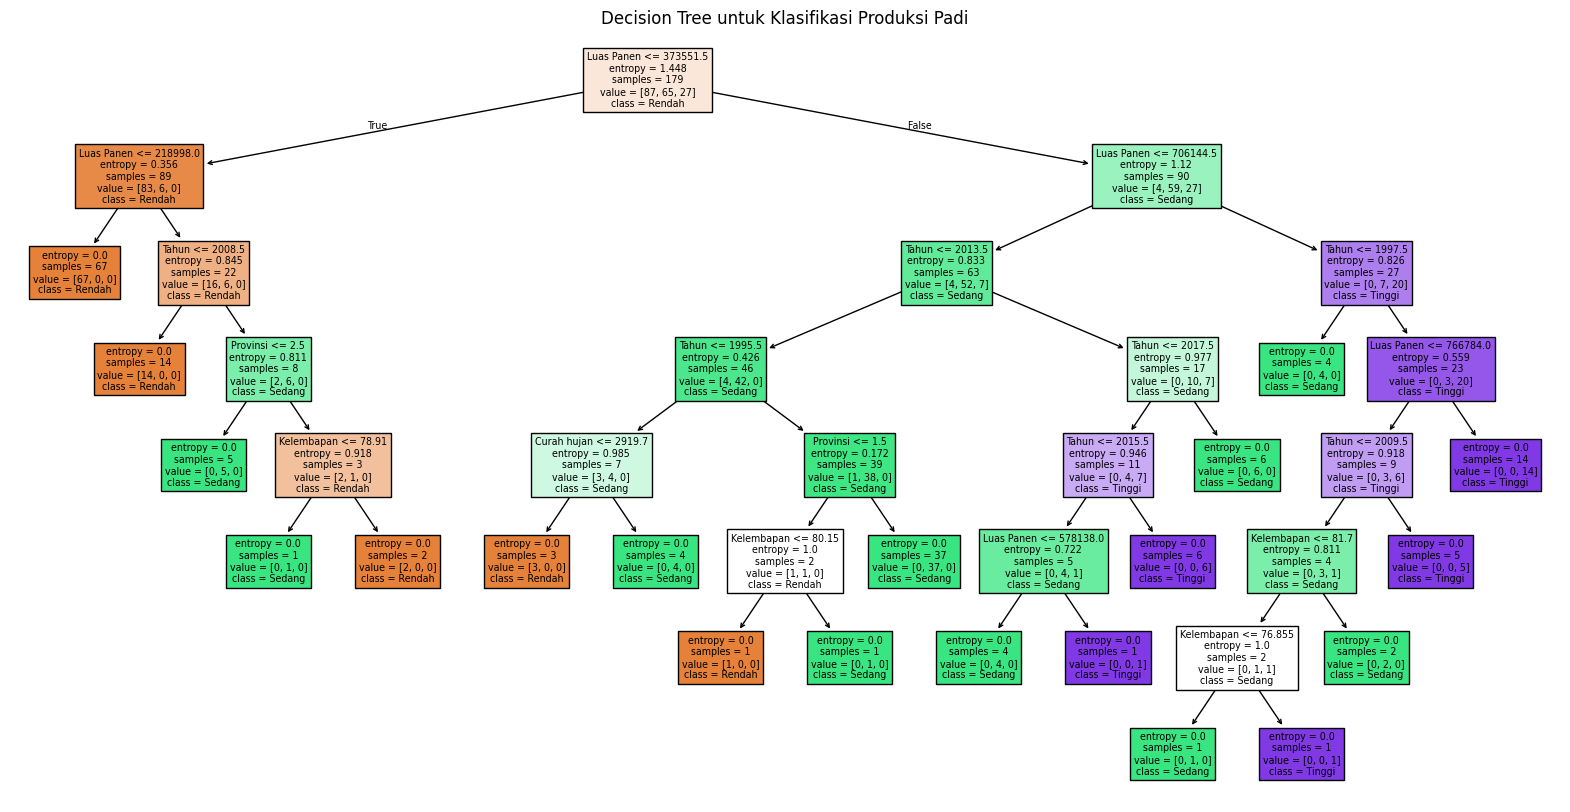

In [9]:
# 9. Visualisasi pohon keputusan
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=le_target.classes_)
plt.title("Decision Tree untuk Klasifikasi Produksi Padi")
plt.show()